In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("housing_data.csv")

In [3]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
cdf = df[['price','bedrooms','bathrooms','sqft_living','yr_built','yr_renovated','sqft_living15','sqft_lot15']]
cdf.head(9)

,price,bedrooms,bathrooms,sqft_living,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,1955,0,1340,5650
1,538000.0,3,2.25,2570,1951,1991,1690,7639
2,180000.0,2,1.00,770,1933,0,2720,8062
3,604000.0,4,3.00,1960,1965,0,1360,5000
4,510000.0,3,2.00,1680,1987,0,1800,7503
5,1225000.0,4,4.50,5420,2001,0,4760,101930
6,257500.0,3,2.25,1715,1995,0,2238,6819
7,291850.0,3,1.50,1060,1963,0,1650,9711
8,229500.0,3,1.00,1780,1960,0,1780,8113


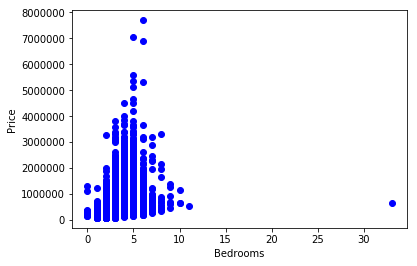

In [11]:
plt.scatter(cdf.bedrooms,cdf.price,  color='blue')
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

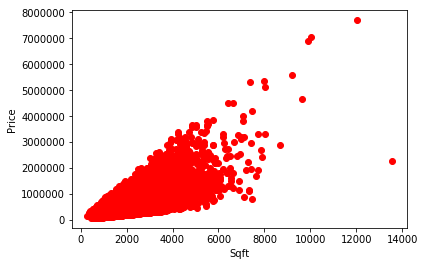

In [12]:
plt.scatter(cdf.sqft_living,cdf.price,  color='red')
plt.xlabel("Sqft")
plt.ylabel("Price")
plt.show()

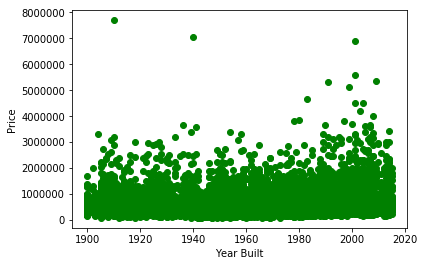

In [13]:
plt.scatter(cdf.yr_built,cdf.price,  color='green')
plt.xlabel("Year Built")
plt.ylabel("Price")
plt.show()

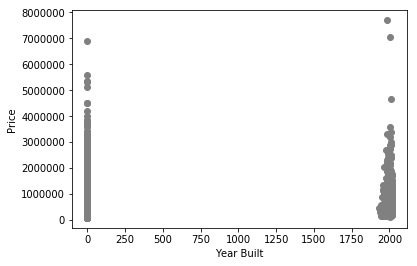

In [17]:
plt.scatter(cdf.yr_renovated,cdf.price,  color='grey')
plt.xlabel("Year Built")
plt.ylabel("Price")
plt.show()

In [62]:
msk = np.random.rand(len(df)) < 0.9
train = cdf[msk]
test = cdf[~msk]

In [61]:
from sklearn import linear_model
mlr = linear_model.LinearRegression()
x = np.asanyarray(train[['bedrooms','sqft_living','yr_built']])
y = np.asanyarray(train[['price']])
mlr.fit (x, y)
print ('Coefficients: ', mlr.coef_)

Coefficients:  [[-59644.38773736    339.04861211  -2419.46365302]]


In [60]:
y_hat= mlr.predict(test[['bedrooms','sqft_living','yr_built']])
x = np.asanyarray(test[['bedrooms','sqft_living','yr_built']])
y = np.asanyarray(test[['price']])
test_x = np.asanyarray(test[['bedrooms','sqft_living','yr_built']])
test_y = np.asanyarray(test[['price']])
test_y_hat = mlr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))

# Variance score is for accuracy prediction
print('Variance score: %.2f' % mlr.score(x, y))

Mean absolute error: 162919.95
Residual sum of squares: 61096030584.94
Variance score: 0.56
